In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#MELISSA'S PATH
path = "/content/drive/MyDrive/DSCI531/project/"

#path = "/content/drive/MyDrive/ [INSERT THE FOLDER IN YOUR DRIVE YOU'RE WORKING OUT FROM] /"
#Example:
##path = "/content/drive/MyDrive/DSCI550/Dataset/"

In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Loading clean Dataset ##clean_wapo_data.csv
with open(path + "cleaned_data.csv", encoding="latin1", errors='ignore') as fh:
  clean_wapo_ds = pd.read_csv(fh)

In [ ]:
#Save df as new variable
wapo_ds = clean_wapo_ds
# #View Data
# wapo_ds.head()

In [ ]:
# Drop data Unnamed
wapo_ds.drop(columns=wapo_ds.columns[0], inplace=True)

In [ ]:
wapo_ds.head()

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


In [ ]:
print (len(wapo_ds))

7035


###View variables I'm focusing on.

In [ ]:
# #Counting NAs, if exist
# n_nans = wapo_ds.isna().sum()
# print ("Detailed NAs per column:\n", n_nans)
# total_count_nans = wapo_ds.isna().sum().sum()
# print ("Total NAs:", total_count_nans)

In [ ]:
# #Data types for each of the dataset column
# print ("The Data types of each column of the dataset are: \n ", wapo_ds.dtypes)

In [ ]:
# ###NEW RACE
# race_count = wapo_ds['race'].value_counts()
# print(race_count)

# #Displaying as percentage
# print (wapo_ds.race.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')


In [ ]:
# ###STATE
# state_count = wapo_ds['state'].value_counts()
# print("There are", len(state_count), "states in this dataset")
# print(state_count)

In [ ]:
###MENTAL ILLNESS
MI_count = wapo_ds['signs_of_mental_illness'].value_counts()
print(MI_count)

False    5508
True     1527
Name: signs_of_mental_illness, dtype: int64


<Axes: xlabel='signs_of_mental_illness'>

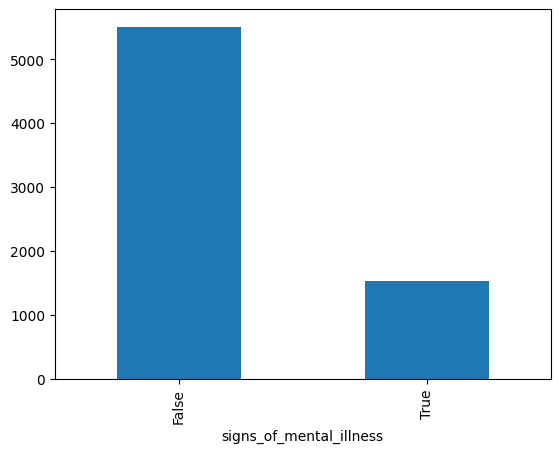

In [ ]:
wapo_ds.pivot_table(index='signs_of_mental_illness', aggfunc='size').plot(kind='bar')

In [ ]:
###UNCOMMENT TO SAVE CLEAN DATASET
# # creating a pandas dataframe with the cleaned data
# cleaned_data_4212023 = pd.DataFrame(wapo_ds)

# # writing the dataframe to a csv file
# cleaned_data_4212023.to_csv("/content/drive/MyDrive/DSCI531/Project/cleaned_data_4212023.csv", index = False)

###Start of Logistic Regression code here

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

In [ ]:
###BOOTSTRAPPING
new_samples = resample(wapo_ds[wapo_ds['signs_of_mental_illness'] == True], n_samples = 2500)

wapo_ds = pd.concat([wapo_ds,new_samples])

In [ ]:
###When you print it out, you'll see that the data set increased
wapo_ds

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,2017-01-01,2017,01-2017,Trevon Johnson,17.0,male,knife,Black,Villa Park,IL,not,False,True,"DuPage County Sheriff's Office, IL"
5541,2021-02-07,2021,02-2021,Dustin Demaurean Powell,34.0,male,knife,Black,Lacy Lakeview,TX,foot,False,True,"Lacy Lakeview Police Department, TX"
2195,2017-05-04,2017,05-2017,Lucille Espinosa,54.0,female,gun,Hispanic,Katy,TX,not,False,True,"Harris County Sheriff's Office, TX"
5301,2020-11-04,2020,11-2020,Michael Moza,30.0,male,gun,White,Detroit,MI,car,False,True,"Detroit Police Department, MI"


In [ ]:
### NEW - Selecting features and targets

# select categorical columns for one-hot encoding
cat_cols = ['race', 'state']

# apply one-hot encoding to categorical columns
X = pd.get_dummies(wapo_ds.drop(['date', 'year', 'month_year', 'name', 'age', 'gender', 'armed', 'city', 'flee', 'body_camera', 'police_departments_involved',
                                 'signs_of_mental_illness'], axis=1), columns=cat_cols)

X = X.apply(pd.to_numeric)

#use replace function?
labels = pd.DataFrame(wapo_ds['signs_of_mental_illness'])
labels[labels['signs_of_mental_illness'] == False] = 0
labels[labels['signs_of_mental_illness'] == True] = 1
labels = labels.apply(pd.to_numeric)

# training logistic regression model for each of the target variable
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()

X.head()

,race_Asian,race_Black,race_Hispanic,race_Native American,race_White,state_AK,state_AL,state_AR,state_AZ,state_CA,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Splitting data into train and test sets
# Set for y_col_1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, labels, test_size=0.3, stratify=labels)


In [ ]:
# Train the logistic regression model for y_col_1
#model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_1 = LogisticRegression()
model_1.fit(X_train_1, y_train_1)

# Make predictions using the logistic regression model for y_col_1
y_pred_1 = model_1.predict(X_test_1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# # Evaluate the model on the test set
# accuracy = model.score(X_test, y_test)
# print(f'The accuracy of the logistic regression model is {accuracy:.2f}')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#evaluting model for y_col_1: getting acc, pre, re, and f1 score
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
precision_1 = precision_score(y_test_1, y_pred_1, average='weighted')
recall_1 = recall_score(y_test_1, y_pred_1, average='weighted')
f1_1 = f1_score(y_test_1, y_pred_1, average='weighted')

print ("These are the performance scores for y_col_1:")
print ("accuracy score:", accuracy_1)
print ("precision score:", precision_1)
print ("recall score:", recall_1)
print ("f1 score:", f1_1)


These are the performance scores for y_col_1:
accuracy score: 0.6225096120237679
precision score: 0.6144564269210104
recall score: 0.6225096120237679
f1 score: 0.6111271276117152


In [ ]:
# print (X)

In [ ]:
# list(X.columns)

[[1266  387]
 [ 693  515]]


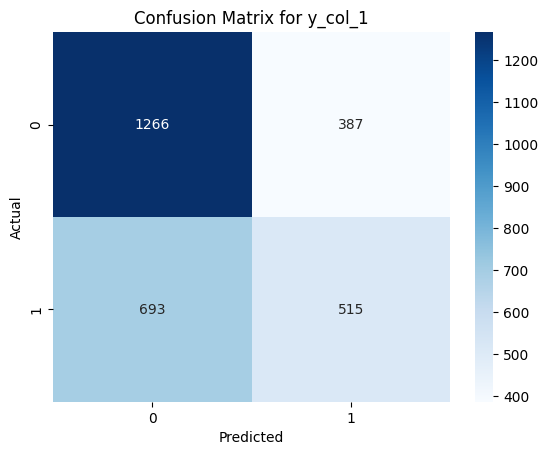

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# create confusion matrix for y_col_1
cm_1 = confusion_matrix(y_test_1, y_pred_1)

print(cm_1)

# plot confusion matrix for y_col_1
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for y_col_1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Notes:
#TP should be in the top left
#google confusion matrix

###Creating individual datasets for CA, TX, and FL

In [ ]:
#WHAT IM WORKING ON NOW:

###List of top 3 states I want to look at:
    # CA    940
    # TX    636
    # FL    455

#Creating dataset with only CA
#CA_data = wapo_ds
CA_data = wapo_ds.drop(wapo_ds[wapo_ds['state'] != 'CA'].index)#, inplace = True)

#Creating dataset with only TX
TX_data = wapo_ds.drop(wapo_ds[wapo_ds['state'] != 'TX'].index)#, inplace = True)

#Creating dataset with only FL
FL_data = wapo_ds.drop(wapo_ds[wapo_ds['state'] != 'FL'].index)#, inplace = True)

In [ ]:
CA_data.head()

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
5,2015-01-04,2015,01-2015,Matthew Hoffman,32.0,male,replica,White,San Francisco,CA,not,False,True,"San Francisco Police Department, CA"
7,2015-01-06,2015,01-2015,Patrick Wetter,25.0,male,knife,White,Stockton,CA,not,False,False,"Stockton Police Department, CA"
22,2015-01-11,2015,01-2015,Brian Barbosa,23.0,male,gun,Hispanic,South Gate,CA,not,False,False,"South Gate Police Department, CA"
33,2015-01-15,2015,01-2015,Jose Ceja,36.0,male,knife,Hispanic,Fairfield,CA,not,False,True,"Fairfield Police Department, CA"
39,2015-01-17,2015,01-2015,Pablo Meza,24.0,male,gun,Hispanic,Los Angeles,CA,not,False,False,"Los Angeles Police Department, CA"


In [ ]:
CA_data

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
5,2015-01-04,2015,01-2015,Matthew Hoffman,32.0,male,replica,White,San Francisco,CA,not,False,True,"San Francisco Police Department, CA"
7,2015-01-06,2015,01-2015,Patrick Wetter,25.0,male,knife,White,Stockton,CA,not,False,False,"Stockton Police Department, CA"
22,2015-01-11,2015,01-2015,Brian Barbosa,23.0,male,gun,Hispanic,South Gate,CA,not,False,False,"South Gate Police Department, CA"
33,2015-01-15,2015,01-2015,Jose Ceja,36.0,male,knife,Hispanic,Fairfield,CA,not,False,True,"Fairfield Police Department, CA"
39,2015-01-17,2015,01-2015,Pablo Meza,24.0,male,gun,Hispanic,Los Angeles,CA,not,False,False,"Los Angeles Police Department, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2017-05-16,2017,05-2017,Edwin Fuentes,24.0,male,gun,Hispanic,Tustin,CA,not,False,True,"Tustin Police Department, CA"
6545,2022-05-03,2022,05-2022,Laron James,54.0,male,gun,Black,Los Angeles,CA,not,False,True,"Los Angeles Police Department, CA"
2194,2017-05-03,2017,05-2017,Mirza Tatlic,24.0,male,gun,White,San Jose,CA,not,False,True,"San Jose Police Department, CA"
3922,2019-04-14,2019,04-2019,Henry Lane,42.0,male,blunt_object,Native American,Red Bluff,CA,foot,False,True,"Red Bluff Police Department, CA"


###Trying to Create a Test set to feed first model for CA

---





In [ ]:
###ATTEMPTING TO FEED A TEST SET TO FIRST MODEL
# For each state (3 States)
# Using the model I already trained rerun on list of states and put out performance metrics
# model_1 is the model that has been trained



## NEW - Selecting features and targets

# select categorical columns for one-hot encoding
cat_cols = ['race', 'state']

# apply one-hot encoding to categorical columns
X3 = pd.get_dummies(CA_data.drop(['date', 'year', 'month_year', 'name', 'age', 'gender', 'armed', 'city', 'flee', 'body_camera', 'police_departments_involved',
                                 'signs_of_mental_illness'], axis=1), columns=cat_cols)

X3 = X3.apply(pd.to_numeric)



#use replace function?
CA_labels = pd.DataFrame(CA_data['signs_of_mental_illness'])
CA_labels[CA_labels['signs_of_mental_illness'] == False] = 0
CA_labels[CA_labels['signs_of_mental_illness'] == True] = 1
CA_labels = CA_labels.apply(pd.to_numeric)

# # training logistic regression model for each of the target variable
# from sklearn.linear_model import LogisticRegression
# model_1 = LogisticRegression()

X3.head()

,race_Asian,race_Black,race_Hispanic,race_Native American,race_White,state_CA
5,0,0,0,0,1,1
7,0,0,0,0,1,1
22,0,0,1,0,0,1
33,0,0,1,0,0,1
39,0,0,1,0,0,1


In [ ]:
#Creating train/test split for CA_data
X_train_CA, X_test_CA, y_train_CA, y_test_CA = train_test_split(X3, CA_labels, test_size=0.3, stratify=CA_labels)


In [ ]:
model_1.fit(X_train_CA, y_train_CA)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred_CA = model_1.predict(X_test_CA)

In [ ]:
#evaluting model for y_col_1: getting acc, pre, re, and f1 score
accuracy_CA = accuracy_score(y_test_CA, y_pred_CA)
precision_CA = precision_score(y_test_CA, y_pred_CA, average='weighted')
recall_CA = recall_score(y_test_CA, y_pred_CA, average='weighted')
f1_CA = f1_score(y_test_CA, y_pred_CA, average='weighted')

print ("These are the performance scores for CA Model:")
print ("accuracy score:", accuracy_CA)
print ("precision score:", precision_CA)
print ("recall score:", recall_CA)
print ("f1 score:", f1_CA)

These are the performance scores for CA Model:
accuracy score: 0.6151832460732984
precision score: 0.607973504680311
recall score: 0.6151832460732984
f1 score: 0.6079862138212111


[[162  59]
 [ 88  73]]


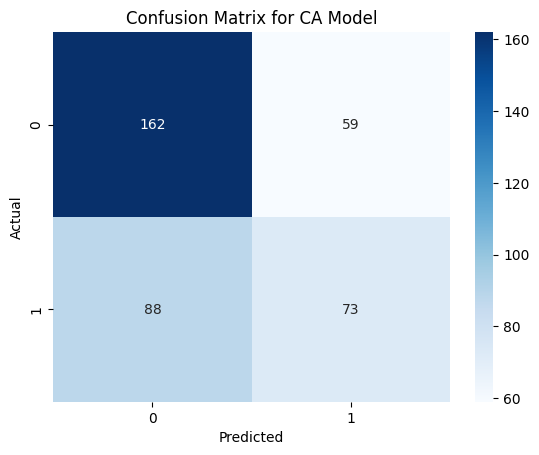

In [ ]:
# create confusion matrix for y_col_1
cm_CA = confusion_matrix(y_test_CA, y_pred_CA)

print(cm_CA)

# plot confusion matrix for y_col_1
sns.heatmap(cm_CA, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CA Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Notes:
#TP should be in the top left
#google confusion matrix

In [ ]:
#Example:
# new_X = X_CA.drop(columns=['signs_of_mental_illness_False', 'signs_of_mental_illness_True'])
# new_pred = model_1.predict(new_X)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


These are the performance scores for y_col_2:
accuracy score: 0.6353591160220995
precision score: 0.6443041304919758
recall score: 0.6353591160220995
f1 score: 0.6013050104781863
[[ 50 107]
 [ 25 180]]


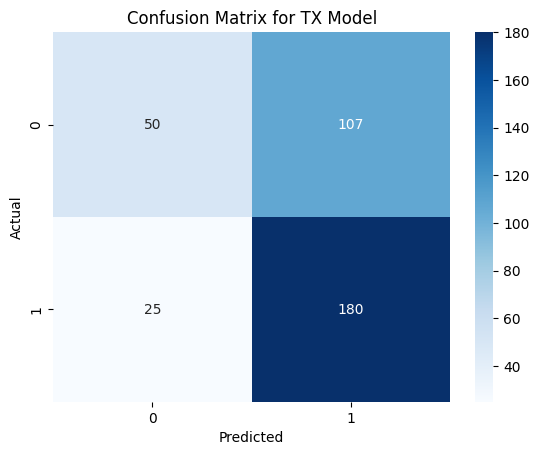

In [ ]:
#Feeding Texas into the model
##BOOTSTRAPPING
new_samples2 = resample(TX_data[TX_data['signs_of_mental_illness'] == True], n_samples = 200)

TX_data= pd.concat([TX_data,new_samples2])

## NEW - Selecting features and targets

# select categorical columns for one-hot encoding
cat_cols = ['race', 'state']

# apply one-hot encoding to categorical columns
X_TX = pd.get_dummies(TX_data.drop(['date', 'year', 'month_year', 'name', 'age', 'gender', 'armed', 'city', 'flee', 'body_camera', 'police_departments_involved',
                                 'signs_of_mental_illness'], axis=1), columns=cat_cols)

X_TX = X_TX.apply(pd.to_numeric)

#use replace function?
TX_labels = pd.DataFrame(TX_data['signs_of_mental_illness'])
TX_labels[TX_labels['signs_of_mental_illness'] == False] = 0
TX_labels[TX_labels['signs_of_mental_illness'] == True] = 1
TX_labels = TX_labels.apply(pd.to_numeric)

# # training logistic regression model for each of the target variable
# from sklearn.linear_model import LogisticRegression
# model_1 = LogisticRegression()

#X_TX.head()
#Creating train/test split for CA_data
X_train_TX, X_test_TX, y_train_TX, y_test_TX = train_test_split(X_TX, TX_labels, test_size=0.3, stratify=TX_labels)

model_1.fit(X_train_TX, y_train_TX)

y_pred_TX = model_1.predict(X_test_TX)

#evaluting model for y_col_1: getting acc, pre, re, and f1 score
accuracy_TX = accuracy_score(y_test_TX, y_pred_TX)
precision_TX = precision_score(y_test_TX, y_pred_TX, average='weighted')
recall_TX = recall_score(y_test_TX, y_pred_TX, average='weighted')
f1_TX = f1_score(y_test_TX, y_pred_TX, average='weighted')

print ("These are the performance scores for y_col_2:")
print ("accuracy score:", accuracy_TX)
print ("precision score:", precision_TX)
print ("recall score:", recall_TX)
print ("f1 score:", f1_TX)

# create confusion matrix for y_col_1
cm_TX = confusion_matrix(y_test_TX, y_pred_TX)

print(cm_TX)

# plot confusion matrix for y_col_1
sns.heatmap(cm_TX, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for TX Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Notes:
#TP should be in the top left
#google confusion matrix


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


These are the performance scores for FL Model:
accuracy score: 0.6458333333333334
precision score: 0.65244708994709
recall score: 0.6458333333333334
f1 score: 0.6446014492753623
[[58 42]
 [26 66]]


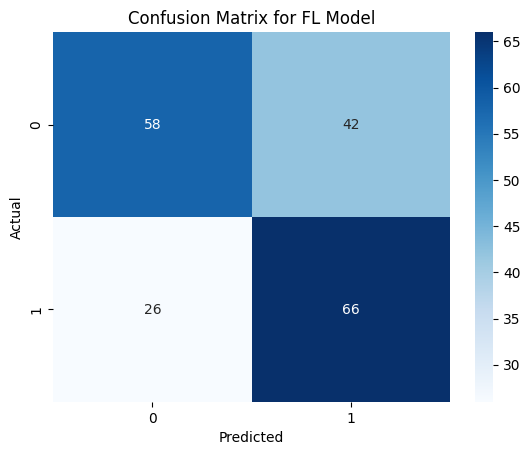

In [ ]:
#Feeding FL into the model
## NEW - Selecting features and targets

# select categorical columns for one-hot encoding
cat_cols = ['race', 'state']

# apply one-hot encoding to categorical columns
X_FL = pd.get_dummies(FL_data.drop(['date', 'year', 'month_year', 'name', 'age', 'gender', 'armed', 'city', 'flee', 'body_camera', 'police_departments_involved',
                                 'signs_of_mental_illness'], axis=1), columns=cat_cols)

X_FL = X_FL.apply(pd.to_numeric)

#use replace function?
FL_labels = pd.DataFrame(FL_data['signs_of_mental_illness'])
FL_labels[FL_labels['signs_of_mental_illness'] == False] = 0
FL_labels[FL_labels['signs_of_mental_illness'] == True] = 1
FL_labels = FL_labels.apply(pd.to_numeric)

# # training logistic regression model for each of the target variable
# from sklearn.linear_model import LogisticRegression
# model_1 = LogisticRegression()

#X_TX.head()
#Creating train/test split for CA_data
X_train_FL, X_test_FL, y_train_FL, y_test_FL = train_test_split(X_FL, FL_labels, test_size=0.3, stratify=FL_labels)

model_1.fit(X_train_FL, y_train_FL)

y_pred_FL = model_1.predict(X_test_FL)

#evaluting model for y_col_1: getting acc, pre, re, and f1 score
accuracy_FL = accuracy_score(y_test_FL, y_pred_FL)
precision_FL = precision_score(y_test_FL, y_pred_FL, average='weighted')
recall_FL = recall_score(y_test_FL, y_pred_FL, average='weighted')
f1_FL = f1_score(y_test_FL, y_pred_FL, average='weighted')

print ("These are the performance scores for FL Model:")
print ("accuracy score:", accuracy_FL)
print ("precision score:", precision_FL)
print ("recall score:", recall_FL)
print ("f1 score:", f1_FL)

# create confusion matrix for y_col_1
cm_FL = confusion_matrix(y_test_FL, y_pred_FL)

print(cm_FL)

# plot confusion matrix for y_col_1
sns.heatmap(cm_FL, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for FL Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Notes:
#TP should be in the top left
#google confusion matrix

###Creating individual logistic regression models for CA, TX, and FL datasets


In [ ]:

#California
# Preprocess the new dataset to match the format of the original dataset
# ...
# select categorical columns for one-hot encoding
cat_cols_CA = ['race', 'state']

# apply one-hot encoding to categorical columns
X_CA = pd.get_dummies(CA_data.drop(['date', 'year', 'month_year', 'name', 'age', 'gender', 'armed', 'city', 'flee', 'body_camera', 'police_departments_involved',
                                 'signs_of_mental_illness'], axis=1), columns=cat_cols_CA)

X_CA = X_CA.apply(pd.to_numeric)


In [ ]:
print (X_CA)

      race_Asian  race_Black  race_Hispanic  race_Native American  race_White  \
5              0           0              0                     0           1   
7              0           0              0                     0           1   
22             0           0              1                     0           0   
33             0           0              1                     0           0   
39             0           0              1                     0           0   
...          ...         ...            ...                   ...         ...   
2227           0           0              1                     0           0   
6545           0           1              0                     0           0   
2194           0           0              0                     0           1   
3922           0           0              0                     1           0   
3763           0           0              0                     0           1   

      state_CA  
5         

In [ ]:
#use replace function?
labels2 = pd.DataFrame(CA_data['signs_of_mental_illness'])
labels2[labels2['signs_of_mental_illness'] == False] = 0
labels2[labels2['signs_of_mental_illness'] == True] = 1
labels2 = labels2.apply(pd.to_numeric)

In [ ]:


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_CA, labels2, test_size=0.3, stratify=labels2)


In [ ]:
# # Use the trained model to make predictions on the new dataset
# new_X = new_data.drop(columns=['target_variable'])
# new_pred_2 = model.predict(new_X)

# Load the trained model from a file (in this case it's already loaded)
#model_1

# Use the trained model to make predictions on the new dataset
#new_X = new_data.drop(columns=['target_variable'])
#new_X = CA_data.drop(columns=['signs_of_mental_illness'])
#new_pred = model_1.predict(X_test_2)

#print (new_pred)
#Explanation: how the model is not doing well and doing well for certain states

# Train the logistic regression model for y_col_1
#model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_2 = LogisticRegression()
model_2.fit(X_train_2, y_train_2)

# Make predictions using the logistic regression model for y_col_1
y_pred_2 = model_2.predict(X_test_2)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# evaluting model for y_col_2: getting acc, pre, re, and f1 score
#'''
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
precision_2 = precision_score(y_test_2, y_pred_2, average='weighted')
recall_2 = recall_score(y_test_2, y_pred_2, average='weighted')
f1_2 = f1_score(y_test_2, y_pred_2, average='weighted')

print ("These are the performance scores for y_col_2:")
print ("accuracy score:", accuracy_2)
print ("precision score:", precision_2)
print ("recall score:", recall_2)
print ("f1 score:", f1_2)

These are the performance scores for y_col_2:
accuracy score: 0.6204188481675392
precision score: 0.6149279563844057
recall score: 0.6204188481675392
f1 score: 0.6157858570632504


[[159  62]
 [ 83  78]]


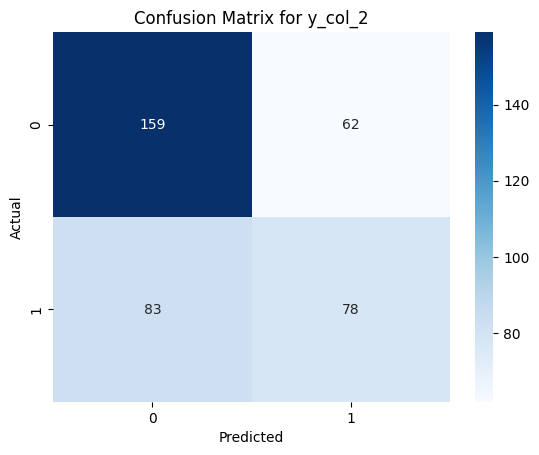

In [ ]:
###Plot confusion matrix for CA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# create confusion matrix for y_col_1
cm_2 = confusion_matrix(y_test_2, y_pred_2)

print(cm_2)

# plot confusion matrix for y_col_1
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for y_col_2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
###BOOTSTRAPPING
new_samples2 = resample(TX_data[TX_data['signs_of_mental_illness'] == True], n_samples = 200)

TX_data= pd.concat([TX_data,new_samples2])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


These are the performance scores for y_col_3:
accuracy score: 0.6026490066225165
precision score: 0.6026490066225165
recall score: 0.6026490066225165
f1 score: 0.6026490066225165
[[97 60]
 [60 85]]


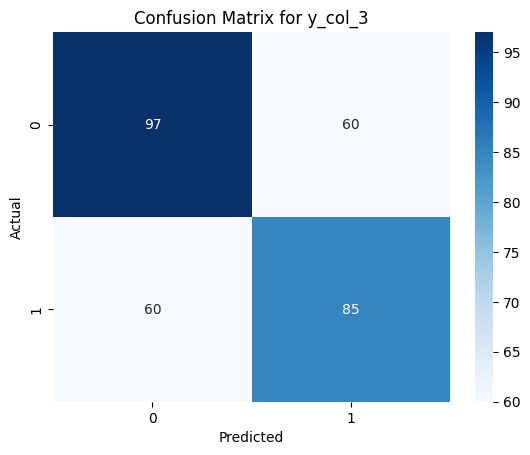

In [ ]:
#Code for TX

# select categorical columns for one-hot encoding
cat_cols_TX = ['race', 'state']

# apply one-hot encoding to categorical columns
X_TX = pd.get_dummies(TX_data.drop(['date', 'year', 'month_year', 'name', 'age', 'gender', 'armed', 'city', 'flee', 'body_camera', 'police_departments_involved',
                                 'signs_of_mental_illness'], axis=1), columns=cat_cols_TX)

X_TX = X_TX.apply(pd.to_numeric)

#use replace function?
labels3 = pd.DataFrame(TX_data['signs_of_mental_illness'])
labels3[labels3['signs_of_mental_illness'] == False] = 0
labels3[labels3['signs_of_mental_illness'] == True] = 1
labels3 = labels3.apply(pd.to_numeric)


#Creating train/test split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_TX, labels3, test_size=0.3, stratify=labels3)

# Train the logistic regression model for y_col_1
#model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_3 = LogisticRegression()
model_3.fit(X_train_3, y_train_3)

# Make predictions using the logistic regression model for y_col_1
y_pred_3 = model_3.predict(X_test_3)


# evaluting model for y_col_2: getting acc, pre, re, and f1 score
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
precision_3 = precision_score(y_test_3, y_pred_3, average='weighted')
recall_3 = recall_score(y_test_3, y_pred_3, average='weighted')
f1_3 = f1_score(y_test_3, y_pred_3, average='weighted')

print ("These are the performance scores for y_col_3:")
print ("accuracy score:", accuracy_3)
print ("precision score:", precision_3)
print ("recall score:", recall_3)
print ("f1 score:", f1_3)


###Plot confusion matrix for TX
# create confusion matrix for y_col_1
cm_3 = confusion_matrix(y_test_3, y_pred_3)

print(cm_3)

# plot confusion matrix for y_col_1
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for y_col_3')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


These are the performance scores for y_col_4:
accuracy score: 0.578125
precision score: 0.5828408466190215
recall score: 0.578125
f1 score: 0.5769217710172484
[[52 48]
 [33 59]]


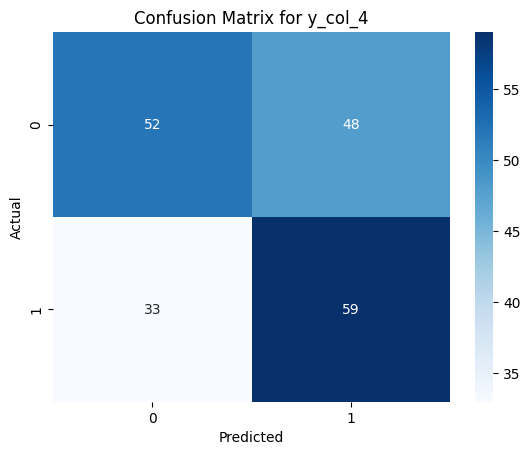

In [ ]:
#Code for FL

# select categorical columns for one-hot encoding
cat_cols_FL = ['race', 'state']

# apply one-hot encoding to categorical columns
X_FL = pd.get_dummies(FL_data.drop(['date', 'year', 'month_year', 'name', 'age', 'gender', 'armed', 'city', 'flee', 'body_camera', 'police_departments_involved',
                                 'signs_of_mental_illness'], axis=1), columns=cat_cols_FL)

X_FL = X_FL.apply(pd.to_numeric)

#use replace function?
labels4 = pd.DataFrame(FL_data['signs_of_mental_illness'])
labels4[labels4['signs_of_mental_illness'] == False] = 0
labels4[labels4['signs_of_mental_illness'] == True] = 1
labels4 = labels4.apply(pd.to_numeric)


#Creating train/test split
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_FL, labels4, test_size=0.3, stratify=labels4)

# Train the logistic regression model for y_col_1
#model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_4 = LogisticRegression()
model_4.fit(X_train_4, y_train_4)

# Make predictions using the logistic regression model for y_col_1
y_pred_4 = model_4.predict(X_test_4)


# evaluting model for y_col_2: getting acc, pre, re, and f1 score
accuracy_4 = accuracy_score(y_test_4, y_pred_4)
precision_4 = precision_score(y_test_4, y_pred_4, average='weighted')
recall_4 = recall_score(y_test_4, y_pred_4, average='weighted')
f1_4 = f1_score(y_test_4, y_pred_4, average='weighted')

print ("These are the performance scores for y_col_4:")
print ("accuracy score:", accuracy_4)
print ("precision score:", precision_4)
print ("recall score:", recall_4)
print ("f1 score:", f1_4)


###Plot confusion matrix for TX
# create confusion matrix for y_col_1
cm_4 = confusion_matrix(y_test_4, y_pred_4)

print(cm_4)

# plot confusion matrix for y_col_1
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for y_col_4')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
CA_data


,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
5,2015-01-04,2015,01-2015,Matthew Hoffman,32.0,male,replica,White,San Francisco,CA,not,False,True,"San Francisco Police Department, CA"
7,2015-01-06,2015,01-2015,Patrick Wetter,25.0,male,knife,White,Stockton,CA,not,False,False,"Stockton Police Department, CA"
22,2015-01-11,2015,01-2015,Brian Barbosa,23.0,male,gun,Hispanic,South Gate,CA,not,False,False,"South Gate Police Department, CA"
33,2015-01-15,2015,01-2015,Jose Ceja,36.0,male,knife,Hispanic,Fairfield,CA,not,False,True,"Fairfield Police Department, CA"
39,2015-01-17,2015,01-2015,Pablo Meza,24.0,male,gun,Hispanic,Los Angeles,CA,not,False,False,"Los Angeles Police Department, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2017-05-16,2017,05-2017,Edwin Fuentes,24.0,male,gun,Hispanic,Tustin,CA,not,False,True,"Tustin Police Department, CA"
6545,2022-05-03,2022,05-2022,Laron James,54.0,male,gun,Black,Los Angeles,CA,not,False,True,"Los Angeles Police Department, CA"
2194,2017-05-03,2017,05-2017,Mirza Tatlic,24.0,male,gun,White,San Jose,CA,not,False,True,"San Jose Police Department, CA"
3922,2019-04-14,2019,04-2019,Henry Lane,42.0,male,blunt_object,Native American,Red Bluff,CA,foot,False,True,"Red Bluff Police Department, CA"


In [ ]:
TX_data

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
14,2015-01-07,2015,01-2015,Ron Sneed,31.0,male,gun,Black,Freeport,TX,not,False,False,"Freeport Police Department, TX"
19,2015-01-09,2015,01-2015,Andy Martinez,33.0,male,gun,Hispanic,El Paso,TX,not,False,False,"El Paso Police Department, TX"
24,2015-01-13,2015,01-2015,Richard McClendon,43.0,male,knife,White,Jourdanton,TX,not,False,True,"Jourdanton Police Department, TX"
27,2015-01-14,2015,01-2015,Robert Edwards,68.0,male,gun,White,Lake Jackson,TX,not,False,False,"Lake Jackson Police Department, TX"
37,2015-01-16,2015,01-2015,Scott Hall,41.0,male,gun,White,Mabank,TX,car,False,False,"Texas Rangers, TX"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,2021-02-07,2021,02-2021,Dustin Demaurean Powell,34.0,male,knife,Black,Lacy Lakeview,TX,foot,False,True,"Lacy Lakeview Police Department, TX"
1701,2016-10-16,2016,10-2016,Micah Dsheigh Jester,26.0,female,replica,White,Austin,TX,not,False,True,"Austin Police Department, TX"
4885,2020-05-14,2020,05-2020,Donny Leek,47.0,male,gun,White,San Angelo,TX,not,False,True,"Texas Department of Public Safety, TX"
417,2015-06-11,2015,06-2015,Mark Flores Jr.,28.0,male,gun,Hispanic,Bexar County,TX,not,False,True,"Bexar County Sheriff's Office, TX"


In [ ]:
FL_data

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
53,2015-01-23,2015,01-2015,Demaris Turner,29.0,male,not_reported,Black,Fort Lauderdale,FL,not,False,False,"Lauderhill Police Department, FL"
85,2015-02-04,2015,02-2015,Izzy Colon,37.0,male,gun,Hispanic,Orlando,FL,not,False,False,"Orlando Police Department, FL"
86,2015-02-04,2015,02-2015,Jeremy Lett,28.0,male,unarmed,Black,Tallahassee,FL,not,False,False,"Tallahassee Police Department, FL"
92,2015-02-08,2015,02-2015,Joseph Paffen,46.0,male,gun,White,Orange County,FL,not,False,False,"Orange County Sheriff's Office, FL"
112,2015-02-15,2015,02-2015,Lavall Hall,25.0,male,unarmed,Black,Miami Gardens,FL,not,False,True,"Miami Gardens Police Department, FL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,2018-08-31,2018,08-2018,Dennis Ray Blalock,64.0,male,gun,White,Floral City,FL,not,False,True,"Citrus County Sheriff's Department, FL"
5239,2020-10-14,2020,10-2020,Yoel Arnaldo Mejia Santel,28.0,male,knife,Hispanic,Frostproof,FL,not,False,True,"Polk County Sheriff's Department, FL"
2406,2017-07-26,2017,07-2017,Susan Teel,62.0,female,knife,White,Vero Beach,FL,not,False,True,"Indian River County Sheriff's Office, FL"
1197,2016-03-26,2016,03-2016,Patrick Matthew McManamon,46.0,male,gun,White,Tampa,FL,not,False,True,"Tampa Police Department, FL"


In [ ]:
###Print the length of the 3 new state focused dataset

print ("CA has", len(CA_data), 'entries')
print ("TX has", len(TX_data), 'entries')
print ("FL has",len(FL_data), 'entries')

CA has 1273 entries
TX has 1006 entries
FL has 640 entries


In [ ]:
###Print count of mental illness per state

#CA
CA_MI_count = CA_data['signs_of_mental_illness'].value_counts()
print("signs_of_mental_illness for CA","\n", CA_MI_count)
#Displaying as percentage
print (CA_data.signs_of_mental_illness.value_counts(normalize=True).mul(100).round(1).astype(str) + '%', "\n")

#TX
TX_MI_count = TX_data['signs_of_mental_illness'].value_counts()
print("signs_of_mental_illness for TX","\n",TX_MI_count)
#Displaying as percentage
print (TX_data.signs_of_mental_illness.value_counts(normalize=True).mul(100).round(1).astype(str) + '%',"\n")

#FL
FL_MI_count = FL_data['signs_of_mental_illness'].value_counts()
print("signs_of_mental_illness for FL","\n", FL_MI_count)
#Displaying as percentage
print (FL_data.signs_of_mental_illness.value_counts(normalize=True).mul(100).round(1).astype(str) + '%',"\n")

signs_of_mental_illness for CA 
 False    737
True     536
Name: signs_of_mental_illness, dtype: int64
False    57.9%
True     42.1%
Name: signs_of_mental_illness, dtype: object 

signs_of_mental_illness for TX 
 False    523
True     483
Name: signs_of_mental_illness, dtype: int64
False    52.0%
True     48.0%
Name: signs_of_mental_illness, dtype: object 

signs_of_mental_illness for FL 
 False    335
True     305
Name: signs_of_mental_illness, dtype: int64
False    52.3%
True     47.7%
Name: signs_of_mental_illness, dtype: object 



In [ ]:
###Print count of race per state

#CA
CA_race_count = CA_data['race'].value_counts()
print("race count for CA","\n", CA_race_count)
#Displaying as percentage
print (CA_data.race.value_counts(normalize=True).mul(100).round(1).astype(str) + '%', "\n")

#TX
TX_race_count = TX_data['race'].value_counts()
print("race count for TX","\n",TX_race_count)
#Displaying as percentage
print (TX_data.race.value_counts(normalize=True).mul(100).round(1).astype(str) + '%',"\n")

#FL
FL_race_count = FL_data['race'].value_counts()
print("race count for FL","\n", FL_race_count)
#Displaying as percentage
print (FL_data.race.value_counts(normalize=True).mul(100).round(1).astype(str) + '%',"\n")

race count for CA 
 Hispanic           551
White              444
Black              216
Asian               56
Native American      6
Name: race, dtype: int64
Hispanic           43.3%
White              34.9%
Black              17.0%
Asian               4.4%
Native American     0.5%
Name: race, dtype: object 

race count for TX 
 White              452
Hispanic           330
Black              215
Asian                8
Native American      1
Name: race, dtype: int64
White              44.9%
Hispanic           32.8%
Black              21.4%
Asian               0.8%
Native American     0.1%
Name: race, dtype: object 

race count for FL 
 White       348
Black       192
Hispanic     98
Asian         2
Name: race, dtype: int64
White       54.4%
Black       30.0%
Hispanic    15.3%
Asian        0.3%
Name: race, dtype: object 



In [ ]:
# #Plotting [INDIVIDUAL] bar graphs for the data sets of CA, TX, FL

# ###Bar chart of distribution of mental illness for CA
# #using value counts to plot count of column
# CA_data['signs_of_mental_illness'].value_counts().plot(kind='bar')
# plt.xlabel('Signs of Mental Illness')
# plt.ylabel('Death Count')
# plt.title("Distribution of Mental Illness Signs in Victims for CA")
# plt.show()

# ###Bar chart of distribution of mental illness for TX
# #using value counts to plot count of column
# TX_data['signs_of_mental_illness'].value_counts().plot(kind='bar')
# plt.xlabel('Signs of Mental Illness')
# plt.title("Distribution of Mental Illness Signs in Victims for TX")
# plt.show()

# ###Bar chart of distribution of mental illness for FL
# #using value counts to plot count of column
# FL_data['signs_of_mental_illness'].value_counts().plot(kind='bar')
# plt.xlabel('Signs of Mental Illness')
# plt.ylabel('Death Count')
# plt.title("Distribution of Mental Illness Signs in Victims for FL")
# plt.show()

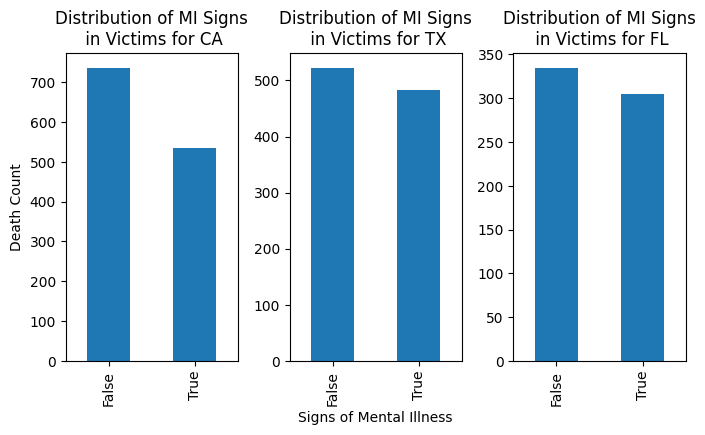

In [ ]:
# #Plotting bar graphs for the data sets of CA, TX, FL [ON THE SAME AXIS]
# create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

# Bar chart of distribution of mental illness for CA
CA_data['signs_of_mental_illness'].value_counts().plot(kind='bar', ax=axs[0])
#axs[0].set_xlabel('Signs of Mental Illness')
axs[0].set_ylabel('Death Count')
axs[0].set_title("Distribution of MI Signs\n in Victims for CA")

# Bar chart of distribution of mental illness for TX
TX_data['signs_of_mental_illness'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Signs of Mental Illness')
axs[1].set_title("Distribution of MI Signs\n in Victims for TX")

# Bar chart of distribution of mental illness for FL
FL_data['signs_of_mental_illness'].value_counts().plot(kind='bar', ax=axs[2])
#axs[2].set_xlabel('Signs of Mental Illness')
#axs[2].set_ylabel('Death Count')
axs[2].set_title("Distribution of MI Signs\n in Victims for FL")

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Save the plot to a PNG file named "myplot.png"
plt.savefig('Distribution of MI Across CA, TX, FL.png')

# display the plots
plt.show()

In [ ]:
# #Plotting [INDIVIDUAL] bar graphs for the data sets of CA, TX, FL

# ###Bar chart of distribution of race for CA
# #using value counts to plot count of column
# CA_data['race'].value_counts().plot(kind='bar')
# plt.xlabel('Race')
# plt.ylabel('Death Count')
# plt.title("Distribution of Race in Victims for CA")
# plt.show()

# ###Bar chart of distribution of race for TX
# #using value counts to plot count of column
# TX_data['race'].value_counts().plot(kind='bar')
# plt.xlabel('Race')
# plt.title("Distribution of Race in Victims for TX")
# plt.show()

# ###Bar chart of distribution of race for FL
# #using value counts to plot count of column
# FL_data['race'].value_counts().plot(kind='bar')
# plt.xlabel('Race')
# plt.ylabel('Death Count')
# plt.title("Distribution of Race in Victims for FL")
# plt.show()

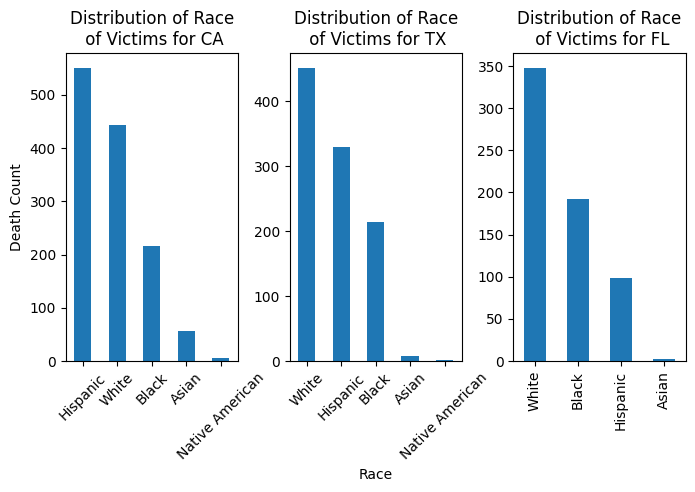

In [ ]:
# #Plotting bar graphs for the data sets of CA, TX, FL [ON THE SAME AXIS]
# create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

# Bar chart of distribution of mental illness for CA
CA_data['race'].value_counts().plot(kind='bar', ax=axs[0])
#axs[0].set_xlabel('Race')
axs[0].set_ylabel('Death Count')
axs[0].set_title("Distribution of Race\n of Victims for CA")
axs[0].tick_params(axis='x', rotation=45)  # set x-label rotation

# Bar chart of distribution of mental illness for TX
TX_data['race'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Race')
axs[1].set_title("Distribution of Race\n of Victims for TX")
axs[1].tick_params(axis='x', rotation=45)  # set x-label rotation

# Bar chart of distribution of mental illness for FL
FL_data['race'].value_counts().plot(kind='bar', ax=axs[2])
#axs[2].set_xlabel('Race')
#axs[2].set_ylabel('Death Count')
axs[2].set_title("Distribution of Race\n of Victims for FL")
axs[2].tick_params(axis='x', rotation=90)  # set x-label rotation

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Save the plot to a PNG file named "myplot.png"
plt.savefig('Distribution of Race Across CA, TX, FL.png')

# display the plots
plt.show()

In [ ]:
###Creating df to see MI x Race looks like

###Getting image of MI x Race for CA
#Getting count of how many deaths were MI (mental illness) related per Race
mi_signs_race = CA_data.groupby(['signs_of_mental_illness', 'race']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_race_count = mi_signs_race .reset_index(drop=False)

#renaming columns of df
mi_df_CA = mi_per_race_count.rename(columns={0: "count"})


###Getting image of MI x Race for TX
#Getting count of how many deaths were MI (mental illness) related per Race
mi_signs_race = TX_data.groupby(['signs_of_mental_illness', 'race']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_race_count = mi_signs_race .reset_index(drop=False)

#renaming columns of df
mi_df_TX = mi_per_race_count.rename(columns={0: "count"})



###Getting image of MI x Race for FL
#Getting count of how many deaths were MI (mental illness) related per Race
mi_signs_race = FL_data.groupby(['signs_of_mental_illness', 'race']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_race_count = mi_signs_race .reset_index(drop=False)

#renaming columns of df
mi_df_FL = mi_per_race_count.rename(columns={0: "count"})

In [ ]:
###print all the data frames
print ('This is mid_df_CA', mi_df_CA, "\n")
print ('This is mid_df_TX', mi_df_TX, "\n")
print ('This is mid_df_FL', mi_df_FL, "\n")



This is mid_df_CA    signs_of_mental_illness             race  count
0                    False            Asian     29
1                    False            Black    140
2                    False         Hispanic    370
3                    False  Native American      4
4                    False            White    194
5                     True            Asian     27
6                     True            Black     76
7                     True         Hispanic    181
8                     True  Native American      2
9                     True            White    250 

This is mid_df_TX    signs_of_mental_illness             race  count
0                    False            Asian      7
1                    False            Black    139
2                    False         Hispanic    171
3                    False  Native American      1
4                    False            White    205
5                     True            Asian      1
6                     True            Black 

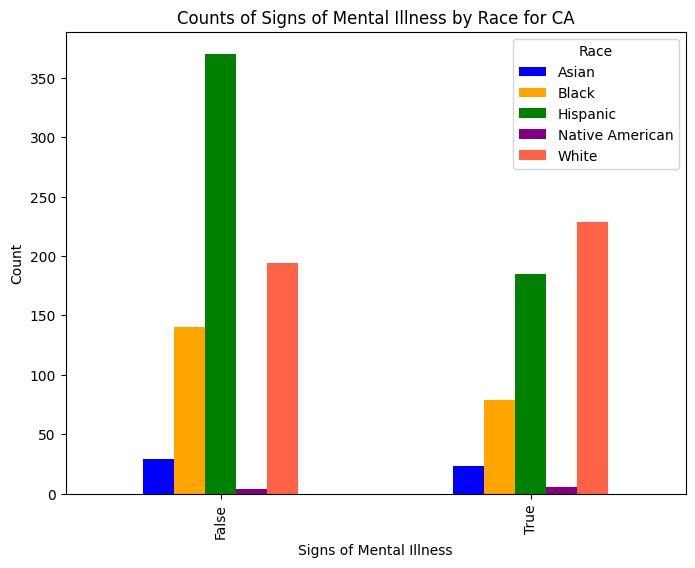

In [ ]:
#Using mid_df_CA to make bar chart
df1 = pd.DataFrame({
    'signs_of_mental_illness': [False, False, False, False, False, True, True, True, True, True],
    'race': ['Asian', 'Black', 'Hispanic', 'Native American', 'White', 'Asian', 'Black', 'Hispanic', 'Native American', 'White'],
    'count': [29, 140, 370, 4, 194, 23, 79, 185, 6, 229]})

# set the size of the figure
fig, ax = plt.subplots(figsize=(8, 6))

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and white_y_n
pivot_df = df1.pivot(index='signs_of_mental_illness', columns='race', values='count')

colors = {'Asian': 'blue', 'Black': 'orange', 'Hispanic': 'green', 'Native American': 'purple', 'White': 'tomato'}

# # set the size of the figure
# fig, ax = plt.subplots)

pivot_df.plot(kind='bar', stacked=False, color=pivot_df.columns.map(colors), ax=ax)

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Counts of Signs of Mental Illness by Race for CA')
plt.legend(title='Race', loc='best', bbox_to_anchor=(1, 1), labels=colors.keys())

# Save the plot to a PNG file named "myplot.png"
plt.savefig('Counts of Signs of Mental Illness by Race for CA.png')

plt.show()

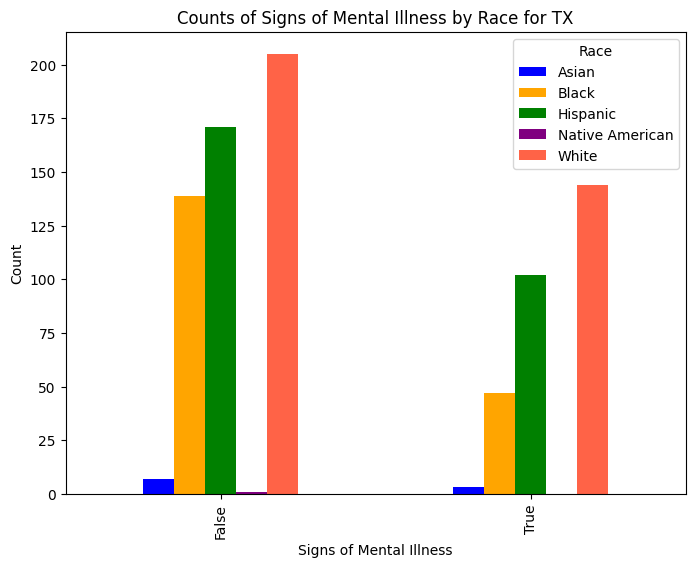

In [ ]:
#using mid_df_TX to make bar chart

df2 = pd.DataFrame({
    'signs_of_mental_illness': [False, False, False, False, False, True, True, True, True],
    'race': ['Asian', 'Black', 'Hispanic', 'Native American', 'White', 'Asian', 'Black', 'Hispanic', 'White'],
    'count': [7, 139, 171, 1, 205, 3, 47, 102, 144]})

# set the size of the figure
fig, ax = plt.subplots(figsize=(8, 6))

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and white_y_n
pivot_df = df2.pivot(index='signs_of_mental_illness', columns='race', values='count')

colors = {'Asian': 'blue', 'Black': 'orange', 'Hispanic': 'green', 'Native American': 'purple', 'White': 'tomato'}

pivot_df.plot(kind='bar', stacked=False, color=pivot_df.columns.map(colors), ax=ax)

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Counts of Signs of Mental Illness by Race for TX')
plt.legend(title='Race', loc='best', bbox_to_anchor=(1, 1), labels=colors.keys())

# Save the plot to a PNG file named "myplot.png"
plt.savefig('Counts of Signs of Mental Illness by Race for TX.png')

plt.show()

In [ ]:
# colors = {'Asian': 'blue', 'Black': 'orange', 'Hispanic': 'green', 'Native American': 'purple', 'White': 'tomato'}

# pivot_df.plot(kind='bar', stacked=False, color=pivot_df.columns.map(colors))

# plt.xlabel('Signs of Mental Illness')
# plt.ylabel('Count')
# plt.title('Counts by Signs of Mental Illness and race')
# plt.legend(title='Race', loc='best', bbox_to_anchor=(1, 1), labels=colors.keys())

# plt.show()

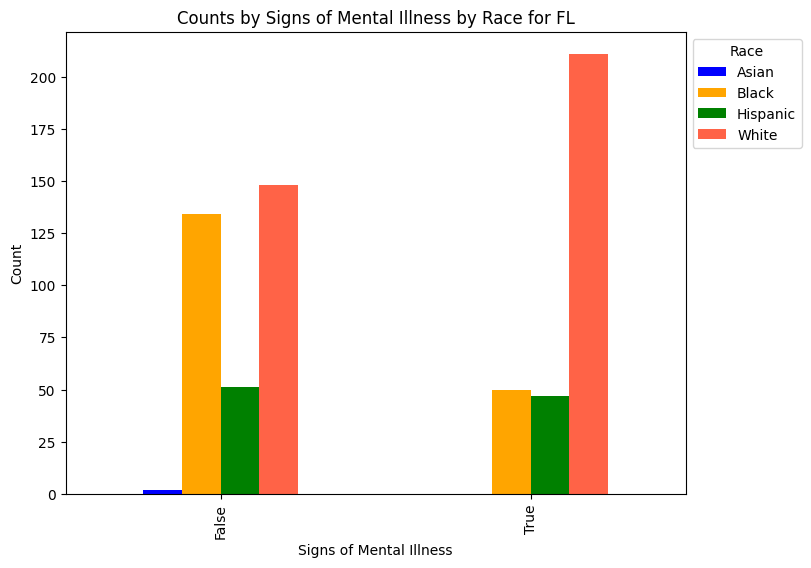

In [ ]:
#using mid_df_FL to make bar chart
df3 = pd.DataFrame({
    'signs_of_mental_illness': [False, False, False, False, True, True, True],
    'race': ['Asian', 'Black', 'Hispanic', 'White','Black', 'Hispanic', 'White'],
    'count': [2, 134, 51, 148, 50, 47, 211]})

# set the size of the figure
fig, ax = plt.subplots(figsize=(8, 6))

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and white_y_n
pivot_df = df3.pivot(index='signs_of_mental_illness', columns='race', values='count')

colors = {'Asian': 'blue', 'Black': 'orange', 'Hispanic': 'green', 'White': 'tomato'}

pivot_df.plot(kind='bar', stacked=False, color=pivot_df.columns.map(colors), ax=ax)

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Counts by Signs of Mental Illness by Race for FL')
plt.legend(title='Race', loc='best', bbox_to_anchor=(1, 1), labels=colors.keys())

# Save the plot to a PNG file named "myplot.png"
plt.savefig('Counts of Signs of Mental Illness by Race for FL.png')

plt.show()

In [ ]:
#Explanation: how the model is not doing well and doing well for certain states
